### 6.3 BACKPROPAGATION 

Backpropagation is a training algorithm used to update the weights of a neural network by propagating the error back through the network. The algorithm is used in supervised learning, where the goal is to minimize the error between the predicted output of the network and the true output.

The backpropagation algorithm starts by forwarding the input data through the network to compute the predicted output. The error is then calculated by comparing the predicted output to the true output. This error is then propagated back through the network, starting from the output layer and working backwards towards the input layer. As the error is propagated back, the weights of the network are updated in order to reduce the error.

The key to the backpropagation algorithm is the use of gradient descent, which is an optimization algorithm used to find the minimum of a function. The gradient of the error with respect to the weights is computed, and the weights are updated in the opposite direction of the gradient. This process is repeated until the error reaches a minimum.

There are several variations of the backpropagation algorithm, including stochastic gradient descent, batch gradient descent, and mini-batch gradient descent. Each variation has its own advantages and disadvantages, and the choice of which to use depends on the specific problem being solved and the resources available.

#### Example

Here is an example of implementing the backpropagation algorithm using Keras and a randomly generated dataset:

The use case we will consider is predicting the price of a house based on its size, number of bedrooms, and location.


Epoch 1/50
20/20 [==============================] - 4s 176ms/step - loss: 207.1991 - val_loss: 190.2537
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 181.1093 - val_loss: 165.0958
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 156.4680 - val_loss: 141.6740
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 133.5000 - val_loss: 119.1680
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 111.3130 - val_loss: 97.6153
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 89.8446 - val_loss: 77.0907
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 69.6745 - val_loss: 57.7298
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 50.9500 - val_loss: 41.1020
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 35.6256 - val_loss: 27.3496
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 23.3640 - val_lo

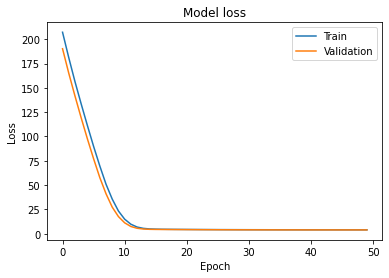

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

np.random.seed(42)

# Generate random dataset
X = np.random.rand(1000, 3) * 10
y = np.sum(X, axis=1) + np.random.randn(1000) * 2

# Split data into training and testing sets
split = 800
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Create neural network
model = keras.Sequential([
    keras.layers.Dense(10, input_dim=3, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


#### Here is another example without Keras

Epoch 100/1000 - Loss: 0.1889
Epoch 200/1000 - Loss: 0.2464
Epoch 300/1000 - Loss: 0.2488
Epoch 400/1000 - Loss: 0.2493
Epoch 500/1000 - Loss: 0.2494
Epoch 600/1000 - Loss: 0.2492
Epoch 700/1000 - Loss: 0.2459
Epoch 800/1000 - Loss: 0.2409
Epoch 900/1000 - Loss: 0.2489
Epoch 1000/1000 - Loss: 0.2497


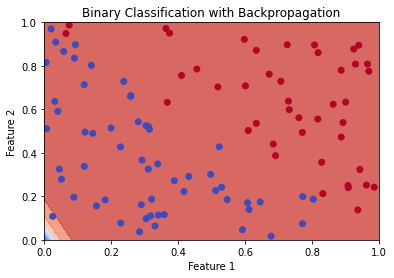

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random dataset with two features
X = np.random.rand(100, 2)

# Assign labels based on whether point is above/below a line
y = np.array([1 if x[0] + x[1] > 1 else 0 for x in X])

# Define sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define neural network architecture
input_size = 2
hidden_size = 4
output_size = 1

# Initialize weights randomly
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)

# Define hyperparameters
learning_rate = 0.1
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    hidden_layer = sigmoid(np.dot(X, W1))
    y_pred = sigmoid(np.dot(hidden_layer, W2))

    # Compute loss
    error = y.reshape(-1, 1) - y_pred
    loss = np.mean(error ** 2)

    # Backpropagation
    dW2 = hidden_layer.T.dot(error * sigmoid_derivative(y_pred))
    dW1 = X.T.dot((error * sigmoid_derivative(y_pred)).dot(W2.T) * sigmoid_derivative(hidden_layer))

    # Update weights
    W2 += learning_rate * dW2
    W1 += learning_rate * dW1

    # Print progress
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {loss:.4f}")

# Plot the decision boundary
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
xx1, xx2 = np.meshgrid(x1, x2)
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
hidden_layer = sigmoid(np.dot(X_grid, W1))
y_pred = sigmoid(np.dot(hidden_layer, W2))
y_grid = y_pred.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_grid, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification with Backpropagation")
plt.show()


### 6.4 CONVOLUTIONAL NEURAL NETWORKS 

Convolutional Neural Networks (CNNs) are a type of deep learning model that are specifically designed to process data that has a grid-like structure, such as an image. CNNs use a technique called convolution to automatically and adaptively learn spatial hierarchies of features from input images.

The architecture of a CNN typically consists of several layers, including:

    •	The input layer: which receives the image data

    •	The convolutional layers: which apply a set of filters to the input image to extract features

    •	The pooling layers: which down-sample the output from the convolutional layers

    •	The fully connected layers: which take the output from the pooling layers and use it to make a prediction


In [12]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# load data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# build CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# evaluate model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


170498071/170498071 [==============================] - 1887s 11us/step
Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5143 - accuracy: 0.4470 - val_loss: 1.2323 - val_accuracy: 0.5564
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1540 - accuracy: 0.5908 - val_loss: 1.1062 - val_accuracy: 0.6086
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0111 - accuracy: 0.6422 - val_loss: 0.9978 - val_accuracy: 0.6491
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9064 - accuracy: 0.6812 - val_loss: 0.9189 - val_accuracy: 0.6792
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8321 - accuracy: 0.7080 - val_loss: 0.9142 - val_accuracy: 0.6778
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7724 - accuracy: 0.7282 - val_loss: 0.8547 - val_accuracy: 0.7059
Epoch 7/10
1563/1563 [==============================]

#### Another Example

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define the CNN architecture
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5242 - accuracy: 0.4437 - val_loss: 1.2295 - val_accuracy: 0.5596
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1602 - accuracy: 0.5899 - val_loss: 1.0654 - val_accuracy: 0.6229
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0112 - accuracy: 0.6456 - val_loss: 0.9889 - val_accuracy: 0.6515
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9103 - accuracy: 0.6838 - val_loss: 0.9298 - val_accuracy: 0.6760
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8377 - accuracy: 0.7057 - val_loss: 0.9120 - val_accuracy: 0.6846
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7778 - accuracy: 0.7277 - val_loss: 0.9186 - val_accuracy: 0.6879
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7286 - accuracy: 0.7442 - val_loss: 0.8520 -

#### Example from Book

Epoch 1/10
313/313 [==============================] - 8s 24ms/step - loss: 0.6761 - accuracy: 0.5675 - val_loss: 0.6615 - val_accuracy: 0.5880
Epoch 2/10
313/313 [==============================] - 8s 26ms/step - loss: 0.6072 - accuracy: 0.6692 - val_loss: 0.5512 - val_accuracy: 0.7190
Epoch 3/10
313/313 [==============================] - 8s 25ms/step - loss: 0.5461 - accuracy: 0.7203 - val_loss: 0.5352 - val_accuracy: 0.7285
Epoch 4/10
313/313 [==============================] - 8s 25ms/step - loss: 0.5098 - accuracy: 0.7486 - val_loss: 0.5014 - val_accuracy: 0.7555
Epoch 5/10
313/313 [==============================] - 7s 22ms/step - loss: 0.4767 - accuracy: 0.7653 - val_loss: 0.4871 - val_accuracy: 0.7505
Epoch 6/10
313/313 [==============================] - 8s 25ms/step - loss: 0.4420 - accuracy: 0.7842 - val_loss: 0.4754 - val_accuracy: 0.7655
Epoch 7/10
313/313 [==============================] - 8s 25ms/step - loss: 0.3944 - accuracy: 0.8199 - val_loss: 0.5011 - val_accuracy: 0.7525

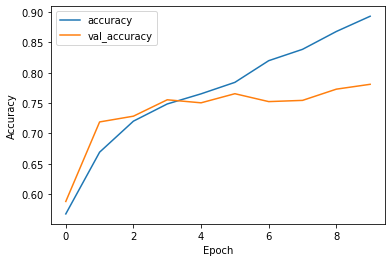

63/63 [==============================] - 0s 7ms/step - loss: 0.5767 - accuracy: 0.7810


[0.5766593813896179, 0.781000018119812]

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Keep only cat and dog images and their labels
train_mask = np.any(y_train == [3, 5], axis=1)
test_mask = np.any(y_test == [3, 5], axis=1)
x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train == 3, num_classes=2)
y_test = keras.utils.to_categorical(y_test == 3, num_classes=2)

# Define the model
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(2, activation="softmax"),
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the training history
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Evaluate the model
model.evaluate(x_test, y_test)


In [8]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
# from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# Pad sequences to a maximum review length in words
max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

# Define the model architecture
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(5000, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/3
391/391 [==============================] - 391s 995ms/step - loss: 0.4594 - accuracy: 0.7772 - val_loss: 0.3523 - val_accuracy: 0.8544
Epoch 2/3
391/391 [==============================] - 399s 1s/step - loss: 0.2914 - accuracy: 0.8827 - val_loss: 0.3335 - val_accuracy: 0.8646
Epoch 3/3
391/391 [==============================] - 395s 1s/step - loss: 0.2463 - accuracy: 0.9054 - val_loss: 0.3106 - val_accuracy: 0.8735
Accuracy: 87.35%


In [4]:
# !pip install keras --upgrade

Defaulting to user installation because normal site-packages is not writeable
